## 캡스톤 3차과제

#### Crawling_execise1

In [12]:
from urllib import request as rq

## ssl 에러 
import ssl
context = ssl._create_unverified_context()


- urllib.request를 사용하여 다운하기 

In [23]:
url = "http://uta.pw/shodou/img/28/214.png"

savename = 'test.png'

rq.urlretrieve(url, savename)
print("저장되었습니다.")

### ssl 에러  python3.8 > Install Certificates.command 파일 실행 

저장되었습니다.


- url open 으로 파일저장

In [18]:
# URL과 저장경로 지정하기
url = "http://uta.pw/shodou/img/28/214.png"
savename = "test1.png"
#다운로드
mem = rq.urlopen(url).read()
#파일로 저장하기, wb는 쓰기와 바이너리모드
with open(savename, mode="wb") as f:
    f.write(mem)
    print("저장되었습니다..")

저장되었습니다..


- API 사용하기 

In [21]:
## 클라리언트 접속 정보를 출력해보자 
#데이터 읽어들이기
url = "http://api.aoikujira.com/ip/ini"
res = rq.urlopen(url)
data = res.read()

#바이너리를 문자열로 변환하기
text = data.decode("utf-8")
print(text)

[ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=121.167.35.45
REMOTE_HOST=121.167.35.45
REMOTE_PORT=39058
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.8
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini




- BeautifulSoup 사용 

In [24]:
from bs4 import BeautifulSoup


In [27]:
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""
html

'\n<html><body>\n  <h1>스크레이핑이란?</h1>\n  <p>웹 페이지를 분석하는 것</p>\n  <p>원하는 부분을 추출하는 것</p>\n</body></html>\n'

In [28]:
# parser를 통해 해석해주는 느낌?
soup = BeautifulSoup(html, 'html.parser')


- 원하는 부분 추출도 가능

In [29]:
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling

- 요소의 글자출력도 가능 

In [30]:
print(f"h1 = {h1.string}")
print(f"p  = {p1.string}")
print(f"p  = {p2.string}")

h1 = 스크레이핑이란?
p  = 웹 페이지를 분석하는 것
p  = 원하는 부분을 추출하는 것


- 단일 element를 추출하는 find() 함수

In [32]:
title = soup.find("h1")
body  = soup.find("p")
print(title,body)


<h1>스크레이핑이란?</h1> <p>웹 페이지를 분석하는 것</p>


In [33]:
# f의 기능? 텍스트부분 출력하기
print(f"#title = {title.string}" )
print(f"#body = {body.string}")

#title = 스크레이핑이란?
#body = 웹 페이지를 분석하는 것


- find_all()로 복수의 elements 추출 가능 

In [34]:
html = """
<html><body>
  <ul>
    <li><a href="http://www.naver.com">naver</a></li>
    <li><a href="http://www.daum.net">daum</a></li>
  </ul>
</body></html>
"""

soup = BeautifulSoup(html, 'html.parser')

In [36]:
links = soup.find_all("a")
print(links, len(links))

for a in links:
    href = a.attrs['href'] # href의 속성에 있는 속성값을 추출 가능 
    text = a.string 
    print(text, ">", href)

[<a href="http://www.naver.com">naver</a>, <a href="http://www.daum.net">daum</a>] 2
naver > http://www.naver.com
daum > http://www.daum.net


- Css Selector 
    - 복잡하게 구조된 사이트에서 자신이 원하는 데이터를 가져오자 

In [37]:
html = """
<html><body>
<div id="meigen">
  <h1>위키북스 도서</h1>
  <ul class="items">
    <li>유니티 게임 이펙트 입문</li>
    <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
    <li>모던 웹사이트 디자인의 정석</li>
  </ul>
</div>
</body></html>
"""

# HTML 분석하기 혹은 해석하기 
soup = BeautifulSoup(html, 'html.parser')

In [39]:
# 타이틀 부분 추출하기 --- (※3)
h1 = soup.select_one("div#meigen > h1").string
print(f"h1 = {h1}")

# 목록 부분 추출하기 --- (※4)
li_list = soup.select("div#meigen > ul.items > li")
for li in li_list:
  print(f"li = {li.string}")

# f12 사용 

h1 = 위키북스 도서
li = 유니티 게임 이펙트 입문
li = 스위프트로 시작하는 아이폰 앱 개발 교과서
li = 모던 웹사이트 디자인의 정석


## 예제풀이 - 네이버 금융

In [49]:
from bs4 import BeautifulSoup
from urllib import request, parse
import requests

In [41]:
url = "https://finance.naver.com/marketindex/"
res = rq.urlopen(url)

In [42]:
soup = BeautifulSoup(res, "html.parser")


In [43]:
# 원하는 데이터 추출 css selector 사용 
price = soup.select_one("div.head_info > span.value").string
print("usd/krw =", price)


usd/krw = 1,163.00


## 예제풀이 - 기상청
#### 기상청 rss에서 xml 특정 내용을 추출하기 


In [45]:
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

# 매개변수를 URL로 인코딩한다.
values = {
    'stnId':'109'
}
# 파이썬 요청으로 전용 매개 변수를 만들 때에는 urllib.parse 모듈의 urlencode()함수를 사용하여 매개 변수를 url로 인코딩한다.
params=parse.urlencode(values)
url += "?"+params # URL에 매개변수 추가
print("url=", url)

res = rq.urlopen(url)

url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109


In [46]:
soup = BeautifulSoup(res, "html.parser")


In [53]:
header = soup.find("header")

title = header.find("title").text
wf = header.find("wf").text

print(title)
print(wf)


서울,경기도 육상중기예보
○ (기온) 이번 예보기간 낮 기온은 22~25도로 오늘(21일, 23~25도)과 비슷하겠고, 아침 기온은 12~16도로 선선하겠습니다.<br />          특히, 내륙을 중심으로 아침 기온이 12~13도 내외로 낮아 낮과 밤의 기온차가 크겠습니다.<br />○ (해상) 서해중부해상의 물결은 1.0~2.0m로 일겠습니다.<br />○ (주말전망) 26일(토)은 오전에 구름많다가 오후에 대체로 맑겠고 27일(일)은 대체로 맑겠습니다. 아침 최저기온은 12~16도, 낮 최고기온은 23~24도가 되겠습니다.


In [63]:
# select()를 사용하면 모든 결과를 리스트에 담고, select_one()을 사용하면 하나의 요소만 반환
title = soup.select_one("title").text
wf = header.select_one("wf").text

print(title)
print(wf)

기상청 육상 중기예보
○ (기온) 이번 예보기간 낮 기온은 22~25도로 오늘(21일, 23~25도)과 비슷하겠고, 아침 기온은 12~16도로 선선하겠습니다.<br />          특히, 내륙을 중심으로 아침 기온이 12~13도 내외로 낮아 낮과 밤의 기온차가 크겠습니다.<br />○ (해상) 서해중부해상의 물결은 1.0~2.0m로 일겠습니다.<br />○ (주말전망) 26일(토)은 오전에 구름많다가 오후에 대체로 맑겠고 27일(일)은 대체로 맑겠습니다. 아침 최저기온은 12~16도, 낮 최고기온은 23~24도가 되겠습니다.


## 예제풀이 - 윤동주 작가의 작품 목록 

In [65]:
url = "https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC"
res = rq.urlopen(url)
soup = BeautifulSoup(res, "html.parser")
# #mw-content-text 바로 아래에 있는 ul 태그 바로 아래에 있는 li 태그 아래에 있는 a 태그를 모두 선택

a_list = soup.select("#mw-content-text   ul > li  a")
for a in a_list:
    name = a.string
    print(f"- {name}", )

- 하늘과 바람과 별과 시
- 증보판
- 서시
- 자화상
- 소년
- 눈 오는 지도
- 돌아와 보는 밤
- 병원
- 새로운 길
- 간판 없는 거리
- 태초의 아침
- 또 태초의 아침
- 새벽이 올 때까지
- 무서운 시간
- 십자가
- 바람이 불어
- 슬픈 족속
- 눈감고 간다
- 또 다른 고향
- 길
- 별 헤는 밤
- 흰 그림자
- 사랑스런 추억
- 흐르는 거리
- 쉽게 씌어진 시
- 봄
- 참회록
- 간(肝)
- 위로
- 팔복
- 못자는밤
- 달같이
- 고추밭
- 아우의 인상화
- 사랑의 전당
- 이적
- 비오는 밤
- 산골물
- 유언
- 창
- 바다
- 비로봉
- 산협의 오후
- 명상
- 소낙비
- 한난계
- 풍경
- 달밤
- 장
- 밤
- 황혼이 바다가 되어
- 아침
- 빨래
- 꿈은 깨어지고
- 산림
- 이런날
- 산상
- 양지쪽
- 닭
- 가슴 1
- 가슴 2
- 비둘기
- 황혼
- 남쪽 하늘
- 창공
- 거리에서
- 삶과 죽음
- 초한대
- 산울림
- 해바라기 얼굴
- 귀뚜라미와 나와
- 애기의 새벽
- 햇빛·바람
- 반디불
- 둘 다
- 거짓부리
- 눈
- 참새
- 버선본
- 편지
- 봄
- 무얼 먹구 사나
- 굴뚝
- 햇비
- 빗자루
- 기왓장 내외
- 오줌싸개 지도
- 병아리
- 조개껍질
- 겨울
- 트루게네프의 언덕
- 달을 쏘다
- 별똥 떨어진 데
- 화원에 꽃이 핀다
- 종시


In [96]:
from bs4 import BeautifulSoup
from urllib import request
from urllib.request import HTTPError, urlopen
import pandas as pd
import requests as rqs


## Naver news crawling 

#### httperror 로 인해서 requests 사용했습니다.

In [103]:
## using css selector 

# url = "https://news.naver.com/"

# res = request.urlopen(url)
# soup = BeautifulSoup(res, "html.parser")

# selector = "#today_main_news > div.hdline_news > ul > li > div.hdline_article_tit > a"

# for a in soup.select(selector):
#     title = a.text
#     print(title)
# def getTitle(url):

#     try:

#       html = urlopen(url)

#     except HTTPError as e:
#      return None
 

#     try:
#       bsObj = BeautifulSoup(html.read(), "html.parser")
#       title = bsObj.body.h1
#     except AttributeError as e:
#       return None
#     return title
 

# title = getTitle("https://news.naver.com/")

# if title == None:

#     print("Title could not be found")

# else:

#     print(title)

# from urllib.request import Request, urlopen

# req = Request('http://www.news.naver.com', headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'})
# webpage = urlopen(req).read()

url = "https://news.naver.com/"

res = rqs.get(url)
soup = BeautifulSoup(res.text, "html.parser")
news_titles = soup.select('#today_main_news > div.hdline_news > ul > li > div.hdline_article_tit > a')

print('총', len(news_titles), '개의 뉴스 제목이 있습니다')

for title in news_titles:
    print(title.text)
# selector = "#today_main_news > div.hdline_news > ul > li > div.hdline_article_tit > a"

# for a in soup.select(selector):
#     title = a.text
#     print(title)

총 5 개의 뉴스 제목이 있습니다

                                        박덕흠 “박원순 시장 특혜 줬겠나… 여당발 이슈 물타기”
                                    

                                        창군 첫 학군출신 육군 총장…“예견된 인사” [뉴스 투데이]
                                    

                                        '제2의 테슬라'는 결국 사기였나…니콜라 창업자 사임 혼란
                                    

                                        '통신비 vs 독감백신' 평행선…여야 추경 힘겨루기
                                    

                                        `권력개혁 회의` 나란히 입장…`특혜의혹` 秋에 힘실어준 文
                                    


## 시민의 소리 게시판 크롤링 

In [93]:
## 시민의 소리 게시판 스크래핑 후 저장 

url_head = "https://www.sisul.or.kr"

url_board = url_head + "/open_content/childrenpark/qna/qnaMsgList.do?pgno=1"



res = request.urlopen(url_board)
soup = BeautifulSoup(res, "html.parser")

selector = "#detail_con > div.generalboard > table > tbody > tr > td.left.title > a"
titles = []
links = []
for a in soup.select(selector):
    titles.append(a.text)
    links.append(url_head + a.attrs["href"])
    
# print(titles, links)

board_df = pd.DataFrame({"title": titles, "link": links})
board_df.head()



,title,link
0,관리인 마스크,https://www.sisul.or.kr/open_content/childrenp...
1,어린이 대공원 쓰레기집하장 내 쓰레기 제거 요청,https://www.sisul.or.kr/open_content/childrenp...
2,"마스크미착용으로 축구 및, 베트민턴 치는 인원이 너무 많아요.",https://www.sisul.or.kr/open_content/childrenp...
3,공원 내 마스크 착용,https://www.sisul.or.kr/open_content/childrenp...
4,청춘핫도그 점장님과 직원분께 감사드립니다,https://www.sisul.or.kr/open_content/childrenp...


In [94]:
board_df.to_csv("board.csv", index=False)


# __동적인 크롤링__



In [104]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame
import time

In [107]:
# selenium 기초 노래 제목 크롤링 
DRIVER_PATH = '/Users/kenken/Documents/chromedriver4ahnsangho'

 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH) 
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# title crawling
title = WebDriverWait(driver, 20) \
    .until(EC.presence_of_element_located((By.CSS_SELECTOR, "#frm > div > table > tbody > tr:nth-child(1) > td:nth-child(4) > div > div")))

# print("Title: {}".format(title.text))

title.text

'Dynamite\n방탄소년단'

- css selector로 주소 규칙 찾기
    - 1번째 제목: #frm > div > table > tbody > tr:nth-child(1) > td:nth-child(4) > div > div"
    - 2번째 제목: #frm > div > table > tbody > tr:nth-child(2) > td:nth-child(4) > div > div

----------------------------------------------------------------

- xpath로 주소 규칙 찾기
    - 1번째 제목: //*[@id="frm"]/div/table/tbody/tr[1]/td[4]/div/div
    - 2번째 제목: //*[@id="frm"]/div/table/tbody/tr[2]/td[4]/div/div


In [108]:
# 2번째 제목 크롤링 xpath
WebDriverWait(driver, 20) \
    .until(EC.presence_of_element_located((By.XPATH, "//*[@id='frm']/div/table/tbody/tr[2]/td[4]/div/div"))).text

'취기를 빌려 (취향저격 그녀 X 산들)\n산들'

- for loop 문으로 자동으로 돌려보자 

In [109]:
# chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 우리가 담을 곳 리스트 만들기 
title_list = []

# title crawling (TOP 50)
for i in range(1, 51):
    title = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.XPATH, f"//*[@id='frm']/div/table/tbody/tr[{i}]/td[4]/div/div")))
    title_list.append(title.text)
    
print(title_list)

['Dynamite\n방탄소년단', '취기를 빌려 (취향저격 그녀 X 산들)\n산들', '눈누난나 (NUNU NANA)\n제시 (Jessi)', '마리아 (Maria)\n화사 (Hwa Sa)', '다시 여기 바닷가\n싹쓰리 (유두래곤, 린다G, 비룡)', 'When We Disco (Duet with 선미)\n박진영', '오래된 노래\n스탠딩 에그', 'How You Like That\nBLACKPINK', '에잇(Prod.&Feat. SUGA of BTS)\n아이유', '내 마음이 움찔했던 순간 (취향저격 그녀 X 규현)\n규현 (KYUHYUN)', 'Dolphin\n오마이걸 (OH MY GIRL)', '아로하\n조정석', 'Downtown Baby\n블루 (BLOO)', '홀로\n이하이', 'Summer Hate (Feat. 비)\n지코 (ZICO)', '덤디덤디 (DUMDi DUMDi)\n(여자)아이들', '어떻게 지내 (Prod. By VAN.C)\n오반', 'Not Shy\nITZY (있지)', 'Blueming\n아이유', 'Dance Monkey\nTones And I', '살짝 설렜어 (Nonstop)\n오마이걸 (OH MY GIRL)', 'Memories\nMaroon 5', '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야\n장범준', 'METEOR\n창모 (CHANGMO)', 'Ice Cream (with Selena Gomez)\nBLACKPINK', '작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)\n방탄소년단', '그 여름을 틀어줘\n싹쓰리 (유두래곤, 린다G, 비룡)', '사랑은 지날수록 더욱 선명하게 남아\n전상근', '사랑하게 될 줄 알았어\n전미도', '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지\nAKMU (악동뮤지션)', '보라빛 밤 (pporappippam)\n선미', '거짓말이라도 해서 널 보고싶어\n백지영', '늦은 밤 너의 집 앞 골목길에서\n노을', "Don't Start Now\nDua L

- 클릭하고 나오고 가사까지 크롤링 가능하다 
    - 노래제목에 링크가 있기에 해당 링크의 xPath도 추가해주자
    

In [111]:
# chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 1번째 click하기
click_element = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, '//*[@id="frm"]/div/table/tbody/tr[1]/td[3]/div/a')))
click_element.click()    
time.sleep(4)
# back
driver.back()


# 2번째 click하기
click_element = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, '//*[@id="frm"]/div/table/tbody/tr[2]/td[3]/div/a')))
click_element.click()    

# back
driver.back()

In [112]:
# chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 변수
title_list = []
artist_list = []
heart_list = []
lyrics_list = []

# crawling (TOP 5 긁어오기 )
for i in range(1, 6):
    # click using XPath
    click_element = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.XPATH, f'//*[@id="frm"]/div/table/tbody/tr[{i}]/td[3]/div/a')))
    click_element.click()

    # title crawling ~~ using css selector
    title = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#downloadfrm > div > div > div.entry > div.info > div.song_name")))
    title_list.append(title.text)

    # artist crawling
    artist = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#downloadfrm > div > div > div.entry > div.info > div.artist > a > span:nth-child(1)")))
    artist_list.append(artist.text)
    
    # heart crawling
    heart = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#d_like_count")))
    heart_list.append(heart.text)

    # lyrics crawling
    lyrics = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#d_video_summary")))
    lyrics_list.append(lyrics.text)
    
    # back
    driver.back()
    
print(title_list)
print(artist_list)
print(heart_list)
print(lyrics_list)

['Dynamite', '취기를 빌려 (취향저격 그녀 X 산들)', '눈누난나 (NUNU NANA)', '마리아 (Maria)', '다시 여기 바닷가']
['방탄소년단', '산들', '제시 (Jessi)', '화사 (Hwa Sa)', '싹쓰리 (유두래곤, 린다G, 비룡)']
['269,306', '95,796', '73,853', '138,311', '221,412']
["Cos ah ah\nI’m in the stars tonight\nSo watch me bring the fire\nand set the night alight\nShoes on get up in the morn\nCup of milk let’s rock and roll\nKing Kong kick the drum\nrolling on like a rolling stone\nSing song when I’m walking home\nJump up to the top LeBron\nDing dong call me on my phone\nIce tea and a game of ping pong\nThis is getting heavy\nCan you hear the bass boom\nI’m ready\nLife is sweet as honey\nYeah this beat cha ching\nlike money\nDisco overload I’m into\nthat I’m good to go\nI'm diamond you know I glow up\nHey so let’s go\nCos ah ah\nI’m in the stars tonight\nSo watch me bring the fire\nand set the night alight\nShining through the city\nwith a little funk and soul\nSo I’mma light it up\nlike dynamite woah\nBring a friend join the crowd\nWhoever wanna com

- 보통 결과값을 데이터프레임 형태로 저장해야한다

In [113]:
# 결과 변수
raw_result = {'title': title_list,
              'artist': artist_list,
              'heart': heart_list,
          'lyrics': lyrics_list}

result = pd.DataFrame(raw_result)

# # csv 파일로 save
# result.to_csv("MelonTop5", mode='w')

# driver 종료
driver.quit()

In [114]:
result

,title,artist,heart,lyrics
0,Dynamite,방탄소년단,"269,306",Cos ah ah\nI’m in the stars tonight\nSo watch ...
1,취기를 빌려 (취향저격 그녀 X 산들),산들,"95,796",언제부턴가 불쑥\n내 습관이 돼버린 너\n혹시나 이런 맘이\n어쩌면 부담일까\n널 ...
2,눈누난나 (NUNU NANA),제시 (Jessi),"73,853",I’m trying to give u\nsomething more\nSo come ...
3,마리아 (Maria),화사 (Hwa Sa),"138,311",욕을 하도 먹어 체했어 하도\n서러워도 어쩌겠어 I do\n모두들 미워하느라 애썼네...
4,다시 여기 바닷가,"싹쓰리 (유두래곤, 린다G, 비룡)","221,412",예아 호우 예예예\n싹쓰리 인더 하우스\n커커커커커몬 싹 쓰리 투 렛츠고\n나 다시...


- 이미지 크롤링도 가능 

In [115]:
 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 변수
link_list = []

# # img crawling (TOP 20)
# 컴퓨터가 힘들어해서 20 까지만 ,. 
for i in range(1, 21):
    
    img = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.CSS_SELECTOR, f"#frm > div > table > tbody > tr:nth-child({i}) > td:nth-child(2) > div > a > img")))

    link_list.append(img.get_attribute('src'))

print(link_list)

['https://cdnimg.melon.co.kr/cm2/album/images/104/79/150/10479150_20200918102847_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/63/600/10463600_20200720152905_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/69/416/10469416_20200730151034_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/52/351/10452351_20200629152036_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/62/799/10462799_20200717150822_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/75/061/10475061_20200812120927_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm/album/images/021/48/596/2148596_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/51/566/10451566_20200626114914_500.jpg/melon/resize/120/quality/80/optimize', 

- 나의 디렉토리에 img 폴더 생성후 실행해 주자

In [119]:
import os
print (os.getcwd())

/Users/kenken


In [120]:
import urllib.request

count = 0
for link in link_list:
    count += 1
    urllib.request.urlretrieve(link, './img/img' + str(count) + '.jpg')

In [130]:
from IPython.display import Image, display


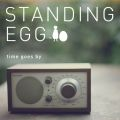

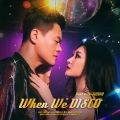

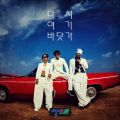

In [135]:

x = Image('img/img7.jpg') 
y = Image('img/img6.jpg') 
z = Image('img/img5.jpg')
display(x, y, z)